In [21]:
# import python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic.csv')

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
y = df['Survived']

In [26]:
X = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [28]:
X['Age'].median()

28.0

In [29]:
X['Age']= X['Age'].fillna(X['Age'].median())

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [31]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


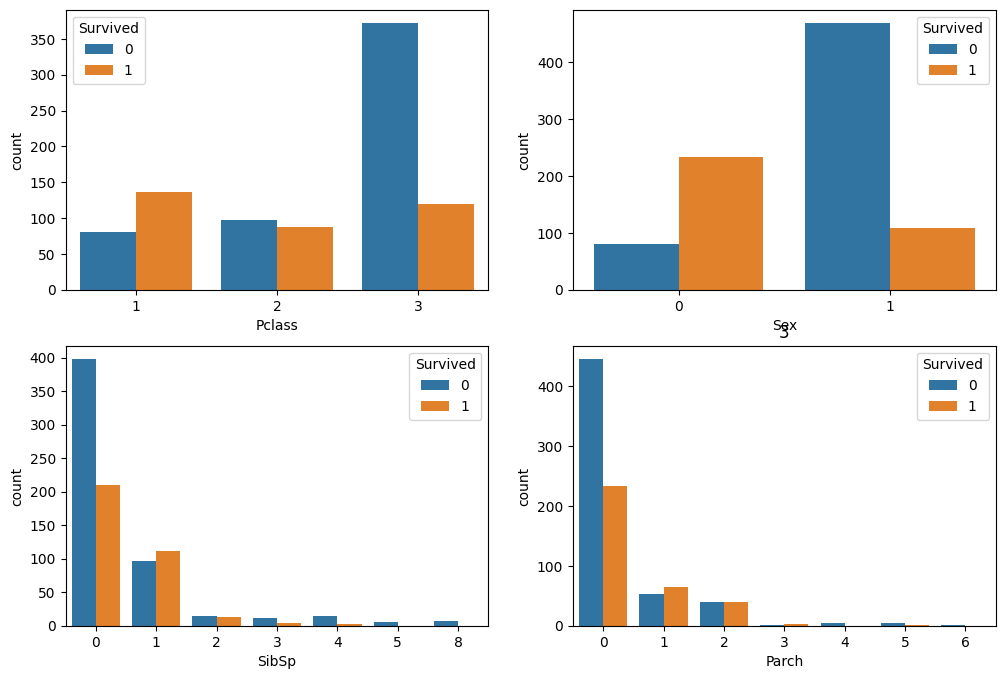

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["Pclass","Sex","SibSp","Parch"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs = axs.ravel()

for i, col in enumerate(columns):
    sns.countplot(data=X, x=col, ax=axs[i],hue='Survived')
    plt.title(i)

plt.show()

In [34]:
X=X.drop(['Survived'],axis=1)

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Apply decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [40]:
# Inport accuracy_score and f1_score
from sklearn.metrics import accuracy_score, f1_score

In [41]:
# Import Classification Report
from sklearn.metrics import classification_report

In [42]:
# decision tree Classification on Train Data
y_pred_train = tree.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
f1_train = f1_score(y_pred_train,y_train)

In [43]:
# Show the over all performance on train data
print('Train Data of Tree: ','\n')
print('Accuracy on Train Data: ', accuracy_train, '\n')
print('F1_Score on Train Data: ', f1_train, '\n')
print('Classification Report on Train Data: ', '\n', '\n', classification_report(y_train, y_pred_train, target_names=[' Not Survived','Survived']))

Train Data of Tree:  

Accuracy on Train Data:  0.8587479935794543 

F1_Score on Train Data:  0.8044444444444444 

Classification Report on Train Data:  
 
                precision    recall  f1-score   support

 Not Survived       0.85      0.93      0.89       381
     Survived       0.87      0.75      0.80       242

     accuracy                           0.86       623
    macro avg       0.86      0.84      0.85       623
 weighted avg       0.86      0.86      0.86       623



In [44]:
# decision tree Classification on Test Data
y_pred_test = tree.predict(X_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_test = f1_score(y_pred_test,y_test)

In [45]:
# Show the over all performance on test data
print('Test Data of Tree: ','\n')
print('Accuracy on Test Data: ', accuracy_test, '\n' )
print('F1 Score on Test Data: ', f1_test, '\n')
print('Classification Report on Test Data: ', '\n','\n', classification_report(y_test, y_pred_test, target_names=['Not Survived','Survived']))

Test Data of Tree:  

Accuracy on Test Data:  0.8134328358208955 

F1 Score on Test Data:  0.7368421052631577 

Classification Report on Test Data:  
 
               precision    recall  f1-score   support

Not Survived       0.83      0.88      0.86       168
    Survived       0.78      0.70      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [46]:
# Apply Confusion Matrix
from sklearn.metrics import confusion_matrix
c_train = confusion_matrix(y_pred_train, y_train)
c_test  = confusion_matrix(y_pred_test, y_test)

In [47]:
# Results of Confusion Matrix on train and test data
print('Confusion Matrix on Train Data: ','\n', c_train, '\n')
print('Confusion Matrix on Test  Data: ', '\n', c_test)

Confusion Matrix on Train Data:  
 [[354  61]
 [ 27 181]] 

Confusion Matrix on Test  Data:  
 [[148  30]
 [ 20  70]]


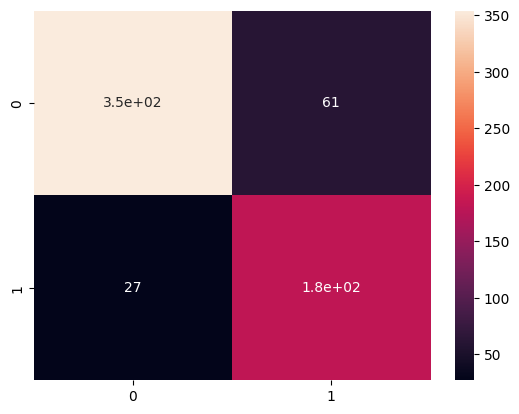

In [48]:
# Apply heatmap on train Data
sns.heatmap(c_train, annot=True)
plt.show()

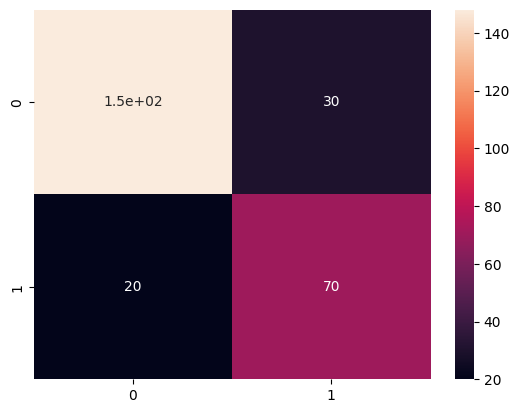

In [49]:
# Apply heatmap on test Data
sns.heatmap(c_test, annot=True)
plt.show()